In [1]:
import os.path

basePath = os.path.abspath("")
dataDirectory = os.path.join(basePath, "data")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(os.path.join(dataDirectory, 'merged.csv'), sep=',', parse_dates=['date', 'nextIgnitionDate'])

In [12]:
df.head()

,date,outsideTemperature,refuellingQuantity,refuellingTimePoint,prematureRefuellingCount,operationPhase,operationPhaseNumeric,residualOxygen,flueGasTemperature,bufferTemperatureTop,...,weatherWindY_24,Year sin,Year cos,Anheizen,Anzünden,Ausbrennen,Ausgeschaltet,Automatik,Vorbelüften,Zündung bereit
0,2019-11-12 15:55:14,8.0,30.0,784.0,0.0,Ausgeschaltet,13,0.0,57.0,78.0,...,-2.431074,-0.751859,0.659324,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-11-12 15:55:24,8.0,30.0,784.0,0.0,Ausgeschaltet,13,0.0,57.0,78.0,...,-2.431074,-0.751858,0.659325,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2019-11-12 15:55:34,8.0,30.0,784.0,0.0,Ausgeschaltet,13,0.0,57.0,78.0,...,-2.431074,-0.751857,0.659327,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2019-11-12 15:55:44,8.0,30.0,784.0,0.0,Ausgeschaltet,13,0.0,57.0,78.0,...,-2.431074,-0.751855,0.659328,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-11-12 15:55:54,8.0,30.0,784.0,0.0,Ausgeschaltet,13,0.0,57.0,78.0,...,-2.431074,-0.751854,0.659330,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
df.drop(columns=['date', 'operationPhase', 'operationPhaseNumeric', 'nextIgnitionDate'], inplace=True)

In [14]:
df.head()

,outsideTemperature,refuellingQuantity,refuellingTimePoint,prematureRefuellingCount,residualOxygen,flueGasTemperature,bufferTemperatureTop,bufferTemperatureMiddleTop,bufferTemperatureMiddle,bufferTemperatureMiddleBottom,...,weatherWindY_24,Year sin,Year cos,Anheizen,Anzünden,Ausbrennen,Ausgeschaltet,Automatik,Vorbelüften,Zündung bereit
0,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-2.431074,-0.751859,0.659324,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-2.431074,-0.751858,0.659325,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-2.431074,-0.751857,0.659327,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-2.431074,-0.751855,0.659328,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-2.431074,-0.751854,0.659330,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Daten aufteilen

Als Nächstes werden die Daten in Trainings-, Validierungs- und Testdaten aufgeteilt. Die Daten werden in chronologischer Reihenfolge aufgeteilt. Dies ist notwendig, damit

1. die Daten später in chronologischer Reihenfolge an die Modelle gegeben werden können und
2. die Modelle auf neuen Daten getestet werden können, die nicht in den Trainingsdaten enthalten sind (bzw. denen sehr ähnlich sind, weil sie zwischen den Zeitreihenwerten der Testdaten liegen).

Als Split wird 70 % der Daten für das Training, 20 % für die Validierung und 10 % für das Testen verwendet.

In [ ]:
df['date_5_minutes_ago'] = df['date'] - pd.Timedelta(minutes=5)
df = df.merge(df[['date', 'bufferChargingDegree']].rename(columns={'bufferChargingDegree': 'previousBufferChargingDegree'}), left_on=['date_5_minutes_ago'], right_on=['date'], how='left')
df.drop(columns=['date_5_minutes_ago', 'date_y'], inplace=True)


In [17]:
df = df[df['nextIgnitionChargingDegree'] >= 14.5]
df = df[df['Ausgeschaltet'] == 1]

In [18]:
# calculate percentual difference between nextIgnitionDateDelta and refuellingTimePointHour
# df['nextIgnitionDateDeltaPercent'] = (df['nextIgnitionDateDelta'] - df['refuellingTimePointHour']) / df['refuellingTimePointHour']
#
#
# # Plot distribution of nextIgnitionDateDeltaPercent using displot and limit x between -1 and 1.5
# sns.displot(df['nextIgnitionDateDeltaPercent'], bins=200, kde=True, aspect=2)
# plt.xlim(-1, 1.5)
#
# # Draw vertical lines for x=0
# plt.axvline(x=0, color='red')

In [19]:
df.head(n=500)

,outsideTemperature,refuellingQuantity,refuellingTimePoint,prematureRefuellingCount,residualOxygen,flueGasTemperature,bufferTemperatureTop,bufferTemperatureMiddleTop,bufferTemperatureMiddle,bufferTemperatureMiddleBottom,...,Year sin,Year cos,Anheizen,Anzünden,Ausbrennen,Ausgeschaltet,Automatik,Vorbelüften,Zündung bereit,previousBufferChargingDegree
0,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-0.751859,0.659324,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
1,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-0.751858,0.659325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-0.751857,0.659327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-0.751855,0.659328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
4,8.0,30.0,784.0,0.0,0.0,57.0,78.0,0.0,61.0,0.0,...,-0.751854,0.659330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.7,30.0,520.0,0.0,0.0,53.0,76.0,0.0,46.0,0.0,...,-0.751196,0.660079,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.1
496,7.7,30.0,520.0,0.0,0.0,53.0,76.0,0.0,46.0,0.0,...,-0.751194,0.660081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.1
497,7.7,30.0,520.0,0.0,0.0,53.0,76.0,0.0,46.0,0.0,...,-0.751193,0.660082,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0
498,7.7,30.0,520.0,0.0,0.0,53.0,76.0,0.0,46.0,0.0,...,-0.751192,0.660084,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0


In [20]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [21]:
# train_mean = train_df.mean()
# train_std = train_df.std()
#
# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

In [22]:
# concatenate dataframes
# df_std = pd.concat([train_df, val_df, test_df], ignore_index=True).sample(n=100000, replace=True)
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
#
# plt.figure(figsize=(12, 6))
#
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

In [23]:
input_columns = ['refuellingTimePoint', 'bufferChargingDegree', 'previousBufferChargingDegree', 'Year sin', 'Year cos', 'temp', 'weatherWindX', 'weatherWindY', 'temp_12', 'weatherWindX_12', 'weatherWindY_12']
output_columns = ['nextIgnitionDateDelta']

train_Xy = train_df[input_columns + output_columns].dropna().sample(n=100000, replace=True)
X_train = train_Xy[input_columns]
y_train = train_Xy[output_columns]

val_Xy = val_df[input_columns + output_columns].dropna()
X_val = val_Xy[input_columns]
y_val = val_Xy[output_columns]

test_Xy = test_df[input_columns + output_columns].dropna()
X_test = test_Xy[input_columns]
y_test = test_Xy[output_columns]



In [24]:
y_train

,nextIgnitionDateDelta
4964653,57.447222
793675,6.108333
1805393,13.772222
3569253,0.977778
5820191,35.305556
...,...
379933,5.711111
3499880,3.205556
4902446,36.775000
4246697,0.155556


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

print(f'{regressor.score(X_test, y_test):.2%}')

/Users/noahpeeters/Developer/holzofen-machine-learning/venv/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83.20%


In [26]:
# calculate mean squared error

from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'{mse:.2f}')

# print RSME
print(f'{np.sqrt(mse):.2f}')

14.68
3.83


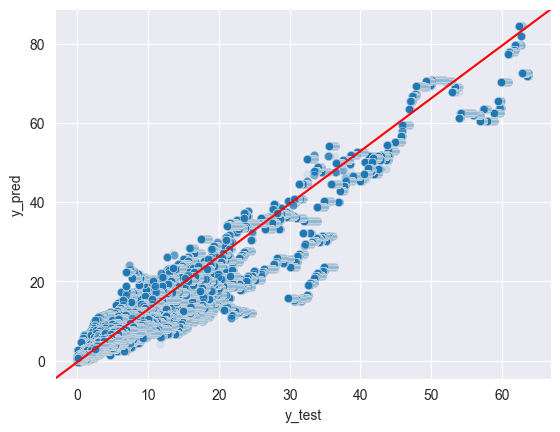

In [27]:
# merge y_test and y_pred
y_test_pred = pd.DataFrame(np.concatenate((y_test, y_pred.reshape(-1, 1)), axis=1), columns=['y_test', 'y_pred'])

# plot y_test and y_pred (scatter plot)
sns.scatterplot(data=y_test_pred, x='y_test', y='y_pred', alpha=0.1)

# add line with slope 1
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

62.73%
32.59
5.71


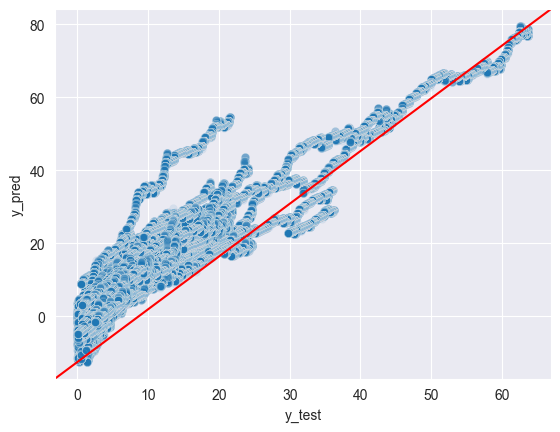

In [28]:
# do the same with a linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'{regressor.score(X_test, y_test):.2%}')

# calculate mean squared error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'{mse:.2f}')

# print RSME
print(f'{np.sqrt(mse):.2f}')

# merge y_test and y_pred
y_test_pred = pd.DataFrame(np.concatenate((y_test, y_pred.reshape(-1, 1)), axis=1), columns=['y_test', 'y_pred'])

# plot y_test and y_pred (scatter plot)
sns.scatterplot(data=y_test_pred, x='y_test', y='y_pred', alpha=0.1)

# add line with slope 1
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

In [29]:
# show which features are most important (and their importance)

feature_importances = pd.DataFrame(regressor.coef_.reshape(-1, 1), index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Year sin,2.438177
temp_12,0.499366
temp,0.429871
bufferChargingDegree,0.380339
weatherWindY_12,0.109672
weatherWindY,0.050958
weatherWindX,0.040994
refuellingTimePoint,0.013798
weatherWindX_12,0.006463
Year cos,-0.069175


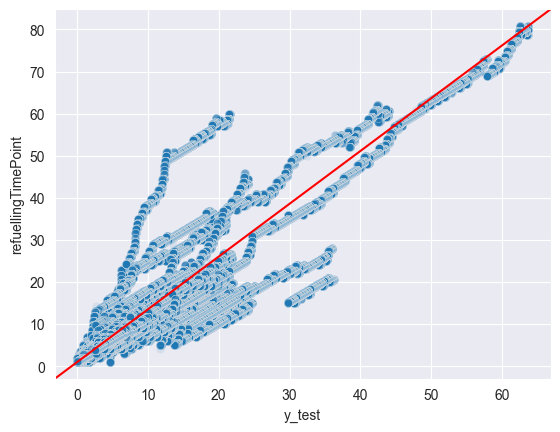

In [30]:
# do the same comparission with y_test and refuellingTimePoint

y_test_refuellingTimePoint = pd.DataFrame(np.concatenate((y_test, test_Xy['refuellingTimePoint'].values.reshape(-1, 1) / 60), axis=1), columns=['y_test', 'refuellingTimePoint'])

# plot y_test and refuellingTimePoint (scatter plot)
sns.scatterplot(data=y_test_refuellingTimePoint, x='y_test', y='refuellingTimePoint', alpha=0.1)

# add line with slope 1
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

In [31]:
# calculate mean squared error with refuellingTimePoint

mse = mean_squared_error(y_test, test_Xy['refuellingTimePoint'] / 60)
print(f'{mse:.2f}')

35.50


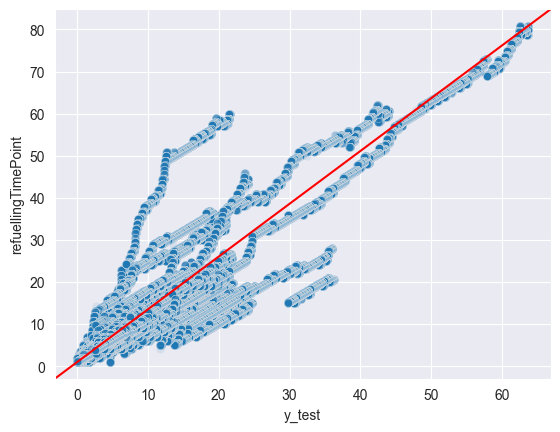

In [32]:
# approximate refuellingTimePoint with linear extrapolation with previousBufferChargingDegree, bufferChargingDegree

# create example data with a new data frame
# test_Xy = test_Xy # pd.DataFrame({'bufferChargingDegree': [50],
#                         'previousBufferChargingDegree': [51]})

# calculate loss_per_hour (previousBufferChargingDegree is 5 minutes in the past)
test_Xy['loss_per_hour'] = (test_Xy['previousBufferChargingDegree'] - test_Xy['bufferChargingDegree']) / 5 * 60

# calculate linearRefuellingTimePoint hours until buffer charging degree is 15
test_Xy['linearRefuellingTimePoint'] = (test_Xy['bufferChargingDegree'] - 15) / test_Xy['loss_per_hour']

# merge y_test and linearRefuellingTimePoint
# y_test_linearRefuellingTimePoint = pd.DataFrame(np.concatenate((y_test, test_Xy['linearRefuellingTimePoint'].values.reshape(-1, 1))), columns=['y_test', 'linearRefuellingTimePoint'])
y_test_linearRefuellingTimePoint = pd.DataFrame(np.concatenate((y_test, test_Xy['refuellingTimePoint'].values.reshape(-1, 1) / 60), axis=1), columns=['y_test', 'refuellingTimePoint'])

# remove inf values
y_test_linearRefuellingTimePoint = y_test_linearRefuellingTimePoint.replace([np.inf, -np.inf], np.nan).dropna()

# show data frame
# test_Xy.head(n=500)

# plot linearRefuellingTimePoint and y_test (scatter plot)
sns.scatterplot(data=y_test_linearRefuellingTimePoint, x='y_test', y='refuellingTimePoint', alpha=0.1)

# add line with slope 1
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

In [33]:

# mean squared error with linearRefuellingTimePoint
mse = mean_squared_error(y_test_linearRefuellingTimePoint['y_test'], y_test_linearRefuellingTimePoint['refuellingTimePoint'])
print(f'{mse:.2f}')

# print RSME
print(f'{np.sqrt(mse):.2f}')

35.50
5.96
